In [132]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import color
from skimage import io

Set kernel size and standartderivation

In [133]:
kernelsize = 7
sigma = 5

if kernelsize%2==1:
    ks=kernelsize
ksn=int((ks-1)/2)

Get image Data

In [136]:
def gaus(x,y,s=1,n=1):
    return np.exp(-((x-n)**2/(2*s**2) + (y-n)**2/(2*s**2)))

def neighbours(a,b,mat,s=ksn):
    neighbors = [mat[i][j] for i in range(a-s, a+s+1) for j in range(b-s, b+s+1) if i > -s and j > -s and j < len(mat[0]) and i < len(mat)] 
    return np.array(neighbors)

#Get RGB_Channels from 4 Channel png
imgi = io.imread('edges.png')[:,:,:3]

#convert to Grayscale
img = color.rgb2gray(imgi)

Create replicate padding

Create gaus-kernel

In [137]:
#gaußmatrix
g = np.zeros(ks**2)
n = 0
c = 0
for i in range(ks):
    for j in range(ks):
        n+=gaus(j,i,sigma)
        g[c]=gaus(j,i,sigma)
        c+=1
g = g/n

Create averaged image

In [139]:
newimg = np.zeros((len(img),len(img[0])))

for a in range(ksn,len(newimg)-ksn):
    for b in range(ksn,len(newimg[0])-ksn):
        newimg[a,b]=np.multiply(g,neighbours(a,b,img)).sum()

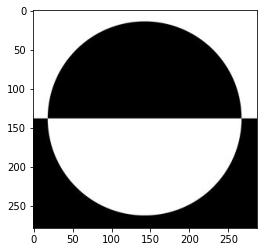

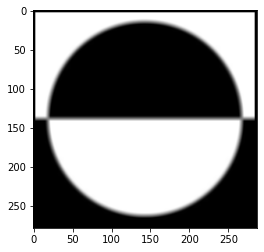

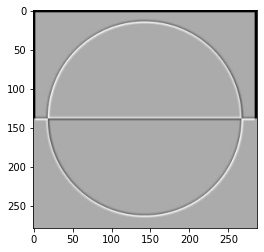

In [140]:
plt.imshow(img)
plt.show()
plt.imshow(newimg)
plt.show()
plt.imshow(newimg-img)
plt.show()